In [1]:
import sys
sys.path.append("..")
import pandas as pd
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
from simulation.rotor_jax import MagneticBearing3D

/home/felipeangelim/.local/lib/python3.8/site-packages/jax/lib/xla_bridge.py:130: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


In [2]:
env = MagneticBearing3D()

In [3]:
num_episodes = 1
history = []

def force(t):
    freq = 21
    f = jnp.sin(2*np.pi*freq*t)
    return jnp.array([f, 0, f, 0])

env.reset()
for _ in range(1000):
    f = force(_*env.dt)
    obs, done = env.step(f)  # take a random action ([0,1.135/2,10,0, 0,1.135/2,0,0.1])
    history.append(obs)

/home/felipeangelim/.local/lib/python3.8/site-packages/jax/lax/lax.py:5946: UserWarning: Explicitly requested dtype <class 'jax.numpy.lax_numpy.float64'> requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))


TypeError: Argument '<simulation.rotor_jax.MagneticBearing3D object at 0x7f25545d6070>' of type <class 'simulation.rotor_jax.MagneticBearing3D'> is not a valid JAX type

In [4]:
history = np.array(history)

In [5]:
history.shape

(1000, 8)

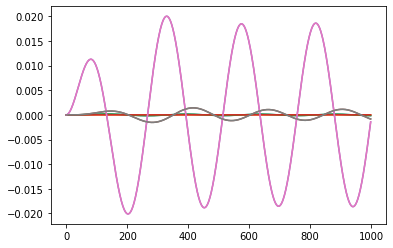

In [6]:
plt.plot(history)
plt.show()